## TimeCourse

 

### Imports and Getting the Test Model

In [2]:
%matplotlib inline
from pycotools import model, tasks, viz, misc, models
import os
import pandas
from lxml import etree

### Get Model Object 

In [7]:
## get string model from `models`
zi_model_string = models.ZiModels().published_zi

## get a working directory. Change this to change this to wherever you like
directory = r'/home/b3053674/Documents/Models/2017/10_Oct/TutorialWorkspace'

## choose path to zi model
zi_path = os.path.join(directory, 'zi2012.cps')

##write model to file
with open(zi_path, 'w') as f:
    f.write(zi_model_string)
    
## check file exists
if not os.path.isfile(zi_path):
    raise Exception
    
zi = model.Model(zi_path)

### Deterministic Time Course
#### Run a deterministic time course

In [ ]:
TC = tasks.TimeCourse(
    zi, report_name='zi_timecourse_report.txt',
    end=1000, intervals=50, step_size=20
)

## check its worked
os.path.isfile(TC.report_name)


df = pandas.read_csv(TC.report_name, sep='\t')
df.head()

##### Save time course configured model

In [ ]:
zi = TC.model
zi.save()

The following equation must hold true: $intervals \cdot step\_size = end$. Alternatively, the model can be saved by setting the `save` keyword to True. 

#### Being selective about which output variables to select
Use the `metabolites`, `global_quantities` and `local_parameters` arguments

In [ ]:
TC=tasks.TimeCourse(
    zi,
    report_name='zi_timecourse_report.txt',
    end=1000,
    intervals=50,
    step_size=20,
    metabolites=['Smad3c','Smad3n', 'Smad4n', 'Smad4c'],
    global_quantities = [],
    save=True
)

##check that we only have two variables
pandas.read_csv(TC.report_name,sep='\t').head()

Note that this model is specifically a deterministic model and will not simulate with the stochastic or hybrid solvers. 

### Visualization

#### Plot the results
By default all species are plotted separetly

In [ ]:
viz.PlotTimeCourse(TC)

#### Plot on the same axis
We can plot on the same axis

In [ ]:
viz.PlotTimeCourse(TC, separate=False)

#### Choose Y variables

In [ ]:
viz.PlotTimeCourse(TC, y=['Smad3c', 'Smad3n'], separate=False)
viz.PlotTimeCourse(TC, y=['Smad4c', 'Smad4n'], separate=False)

#### Plot in Phase Space
Choose the x variable to plot phase space. Same arguments apply as above. 

In [ ]:
viz.PlotTimeCourse(TC, x='Smad3c', separate=True)

#### Save to file

In [ ]:
viz.PlotTimeCourse(TC, y=['Smad3c', 'Smad3n'], separate=False, savefig=True, filename='MyTimeCourse.eps')

### Alternative Solvers
Valid arguments for the `method` argument of `TimeCourse` are:

    -  deterministic
    -  direct
    -  gibson_bruck
    -  tau_leap
    -  adaptive_tau_leap
    -  hybrid_runge_kutta
    -  hybrid_lsoda

Copasi also includes a `hybrid_rk45` solver but this is not yet supported by Pycotools. To use an alternative solver, pass the name of the solver to the `method` argument. 

#### Stochastic MM
For demonstrating simulation of stochastic time courses we build another michaelis-menten type reaction schema 

In [33]:
working_directory = r'/home/b3053674/Documents/Models/2017/12_Dec/PycotoolsWorkflowDir'
copasi_file = os.path.join(working_directory, 'MichaelisMentenStochastic.cps')

if os.path.isfile(copasi_file):
    os.remove(copasi_file)

    
kf = 100
kb = 0.1
kcat = 0.05
E = 200
S = 1000
with model.Build(copasi_file) as m:
    m.name = 'Michaelis-Menten Stochastic'
    m.add('compartment', name='Cell', initial_value=1e-15)
    
    m.add('metabolite', name='P', particle_numbers=0)
    m.add('metabolite', name='S', particle_numbers=S)
    m.add('metabolite', name='E', particle_numbers=E)
    m.add('metabolite', name='ES', particle_numbers=0)
    
    m.add('reaction', name='S bind E', expression='S + E -> ES', rate_law='kf*S*E',
          parameter_values={'kf': kf})
    
    m.add('reaction', name='S unbind E', expression='ES -> S + E', rate_law='kb*ES',
         parameter_values={'kb': kb})

    m.add('reaction', name='ES produce P', expression='ES -> P + E', rate_law='kcat*ES', 
          parameter_values={'kcat': kcat})
    
stochastic_michaelis_menten = model.Model(copasi_file)
stochastic_michaelis_menten

Model(name=Michaelis-Menten Stochastic, time_unit=s, volume_unit=ml, quantity_unit=mmol)

### Run a Time Course Using Direct Method

In [34]:
TC = tasks.TimeCourse(stochastic_michaelis_menten, end=100, intervals=100, step_size=1, method='direct')

### Plot stochastic time course

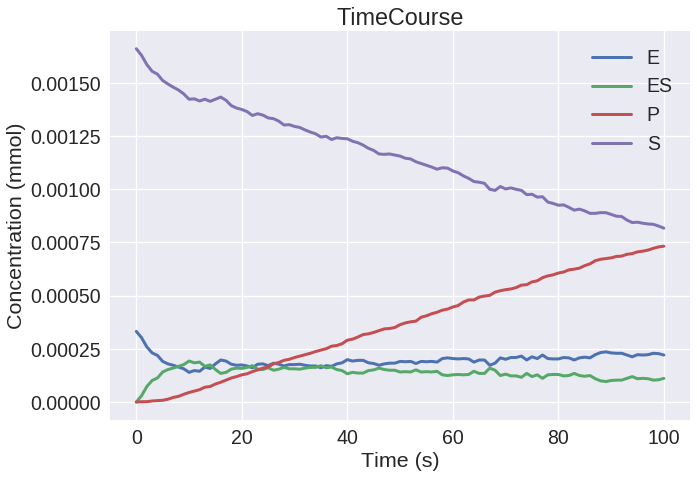

In [35]:
viz.PlotTimeCourse(TC, separate=False)